# **Importing Libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

2025-04-04 14:57:32.815238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743796652.944048     449 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743796652.981814     449 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743796653.582548     449 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743796653.582590     449 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743796653.582593     449 computation_placer.cc:177] computation placer alr

In [13]:
print("GPU disponible:", tf.config.list_physical_devices('GPU'))
print("Versión de TensorFlow:", tf.__version__)

GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Versión de TensorFlow: 2.19.0


# **Carregando Dados**

In [3]:
#Give dataset path
train_path = '/content/Data/train'
test_path = '/cc/Data/test'

In [4]:
folders = glob('/content/Data/train/*')
len(folders)

0

# **Arquitetura**

In [6]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

I0000 00:00:1743796669.584442     449 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6


In [7]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential


for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,116,580 (88.18 MB)

 Trainable params: 1,708,676 (6.52 MB)

 Non-trainable params: 21,407,904 (81.66 MB)

In [8]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

# **Image Augmentation**

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.25,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory('Data/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 613 images belonging to 4 classes.


# **Formação do Modelo**

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

In [16]:
model.compile(
    optimizer='adam',             
    loss='categorical_crossentropy', 
    metrics=['accuracy']         
)


r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    batch_size = 32,
    callbacks=[early_stopping_callback]
    
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5696 - loss: 1.0044 - val_accuracy: 0.6917 - val_loss: 0.7627
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 535ms/step - accuracy: 0.6167 - loss: 0.8628 - val_accuracy: 0.8042 - val_loss: 0.4905
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 560ms/step - accuracy: 0.7358 - loss: 0.6174 - val_accuracy: 0.8467 - val_loss: 0.4147
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - accuracy: 0.8067 - loss: 0.4984 - val_accuracy: 0.9217 - val_loss: 0.2270
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 536ms/step - accuracy: 0.8405 - loss: 0.3898 - val_accuracy: 0.8173 - val_loss: 0.4322
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 536ms/step - accuracy: 0.8698 - loss: 0.3369 - val_accuracy: 0.8630 - val_loss: 0.3850
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 484ms/step - accuracy: 0.9082 - loss: 0.2745 - val_accuracy: 0.9380 - val_loss: 0.1665
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 537ms/step - accuracy: 0.9166 - loss: 0.2098 - val_accuracy

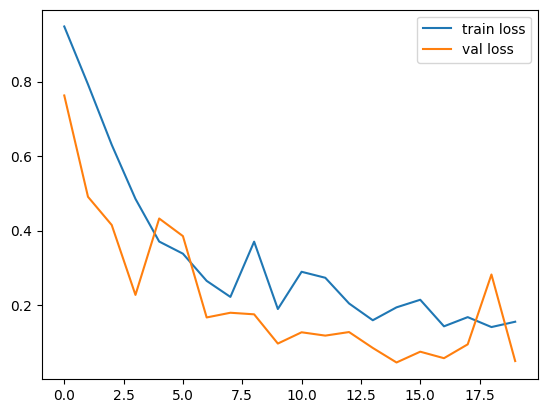

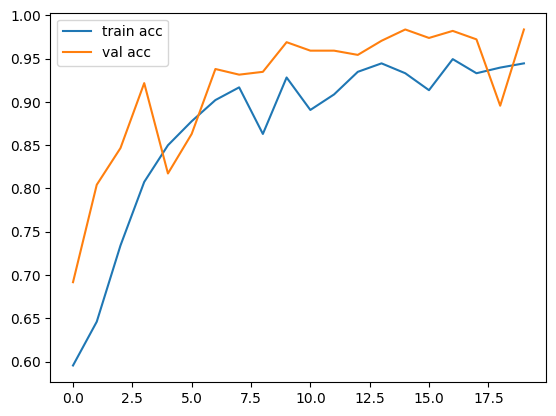

<Figure size 640x480 with 0 Axes>

In [17]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# **Fazendo Predições**

In [18]:
y_pred = model.predict(test_set)

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 408ms/step


In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 3, 3, 3, 1, 2, 2, 3, 0, 3, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 3, 2,
       0, 1, 2, 1, 2, 0, 1, 3, 0, 2, 3, 0, 0, 3, 1, 3, 2, 2, 2, 3, 3, 0,
       1, 0, 0, 1, 0, 0, 2, 3, 1, 1, 0, 3, 3, 0, 1, 2, 2, 1, 1, 1, 3, 0,
       1, 3, 3, 1, 1, 0, 0, 0, 3, 0, 0, 3, 2, 0, 0, 2, 3, 3, 0, 1, 0, 2,
       0, 3, 3, 1, 0, 3, 3, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 3, 3, 0, 1, 1,
       3, 1, 0, 0, 3, 0, 3, 1, 3, 1, 1, 3, 0, 1, 0, 1, 2, 3, 0, 2, 2, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 3, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 3, 3, 0, 3, 3, 3, 0, 1, 1, 0, 0, 0,
       0, 2, 3, 0, 0, 3, 1, 1, 2, 3, 3, 3, 0, 2, 2, 0, 3, 0, 0, 3, 3, 3,
       1, 3, 0, 3, 0, 0, 2, 2, 0, 0, 3, 2, 2, 1, 3, 0, 2, 0, 3, 2, 1, 3,
       1, 2, 0, 2, 1, 2, 2, 3, 1, 0, 3, 1, 3, 0, 3, 0, 0, 3, 0, 1, 3, 2,
       0, 1, 0, 0, 0, 2, 3, 0, 2, 0, 1, 3, 0, 0, 2, 0, 0, 3, 1, 3, 3, 2,
       0, 2, 3, 0, 0, 1, 2, 2, 1, 3, 2, 2, 0, 3, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 0, 2, 3, 0, 1, 0, 0, 3, 3, 1, 2, 1, 3, 3,

In [20]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma Lung Cancer"]

In [21]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------Chest Cancer Type Detection---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)

    print(classes[np.argmax(model.predict(x))])


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
AdenocarcinomaChest Lung Cancer 


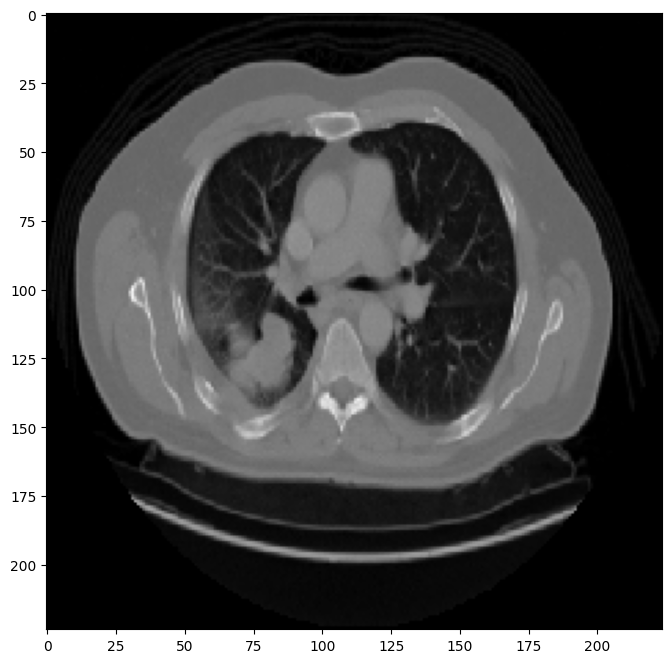

In [22]:
im=image.load_img('Data/test/adenocarcinoma/000113 (7).png',target_size=(224,224))
predict_image(im)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Large cell carcinoma Lung Cancer


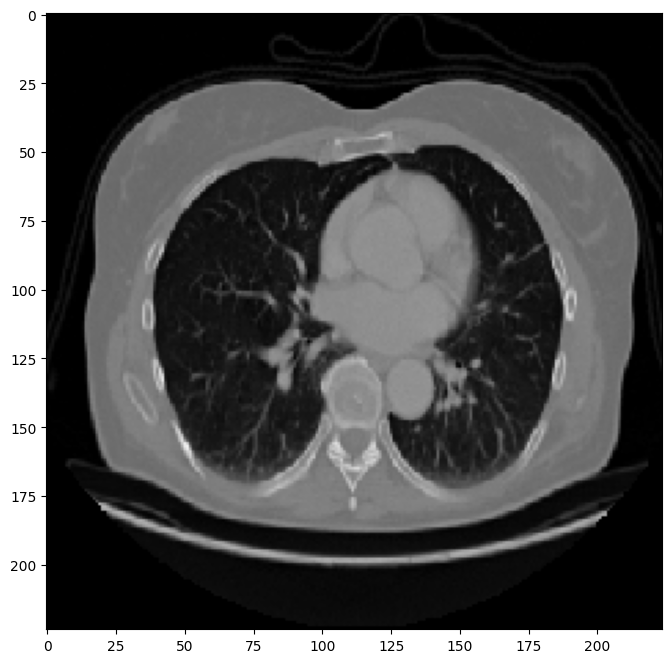

In [23]:
im2=image.load_img('Data/test/large.cell.carcinoma/000111.png',target_size=(224,224))
predict_image(im2)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Squamous cell carcinoma Lung Cancer


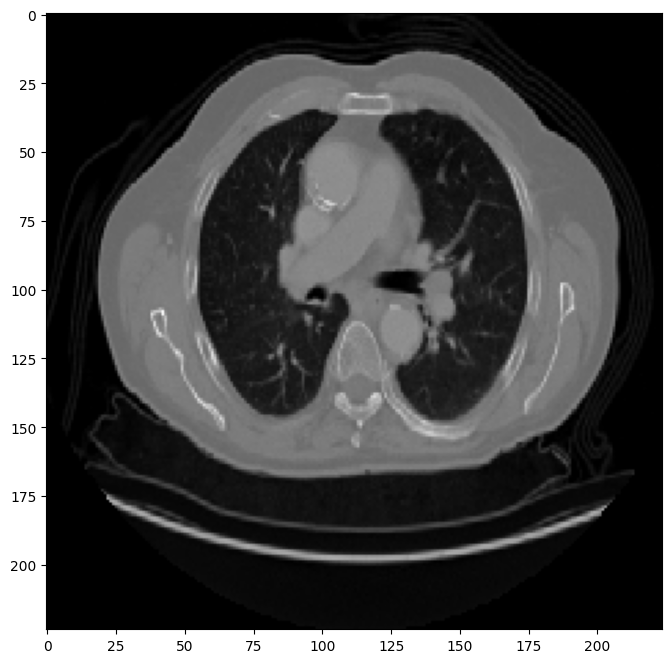

In [24]:
im3=image.load_img('Data/test/squamous.cell.carcinoma/000112.png',target_size=(224,224))
predict_image(im3)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
AdenocarcinomaChest Lung Cancer 


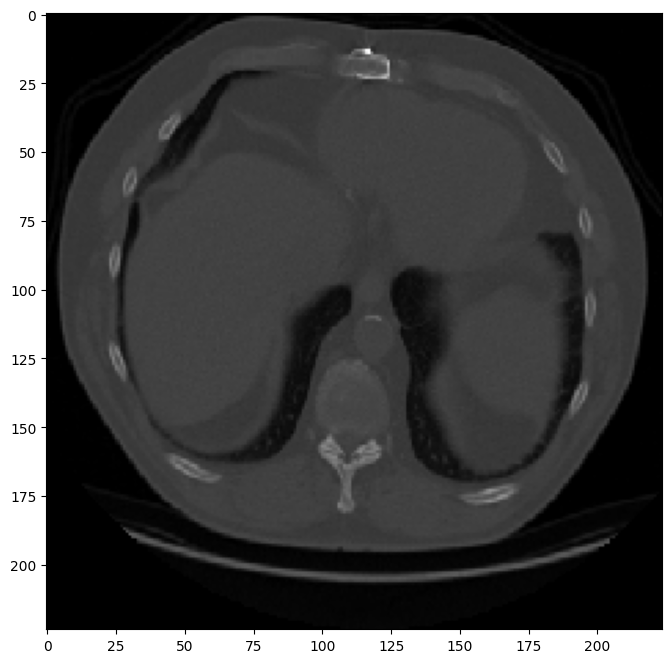

In [25]:
im4=image.load_img('Data/test/squamous.cell.carcinoma/000118 (3).png',target_size=(224,224))
predict_image(im4)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
NO Lung Cancer/ NORMAL


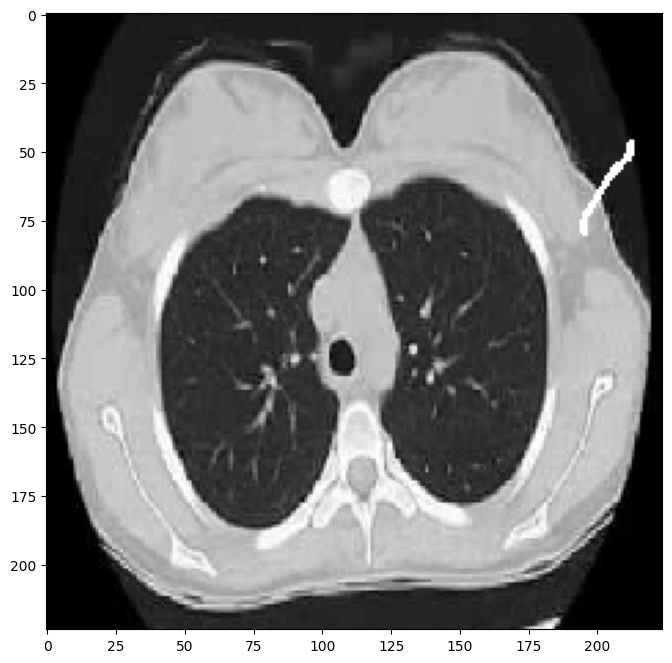

In [26]:
im5=image.load_img('Data/test/normal/10 - Copy.png',target_size=(224,224))
predict_image(im5)